## Monitor triplet performance

In [73]:
import gzip
#from reddit.utils import load_tfrecord
import json
import numpy as np
from pathlib import Path
import glob
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
import random
from IPython.display import Markdown, display
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

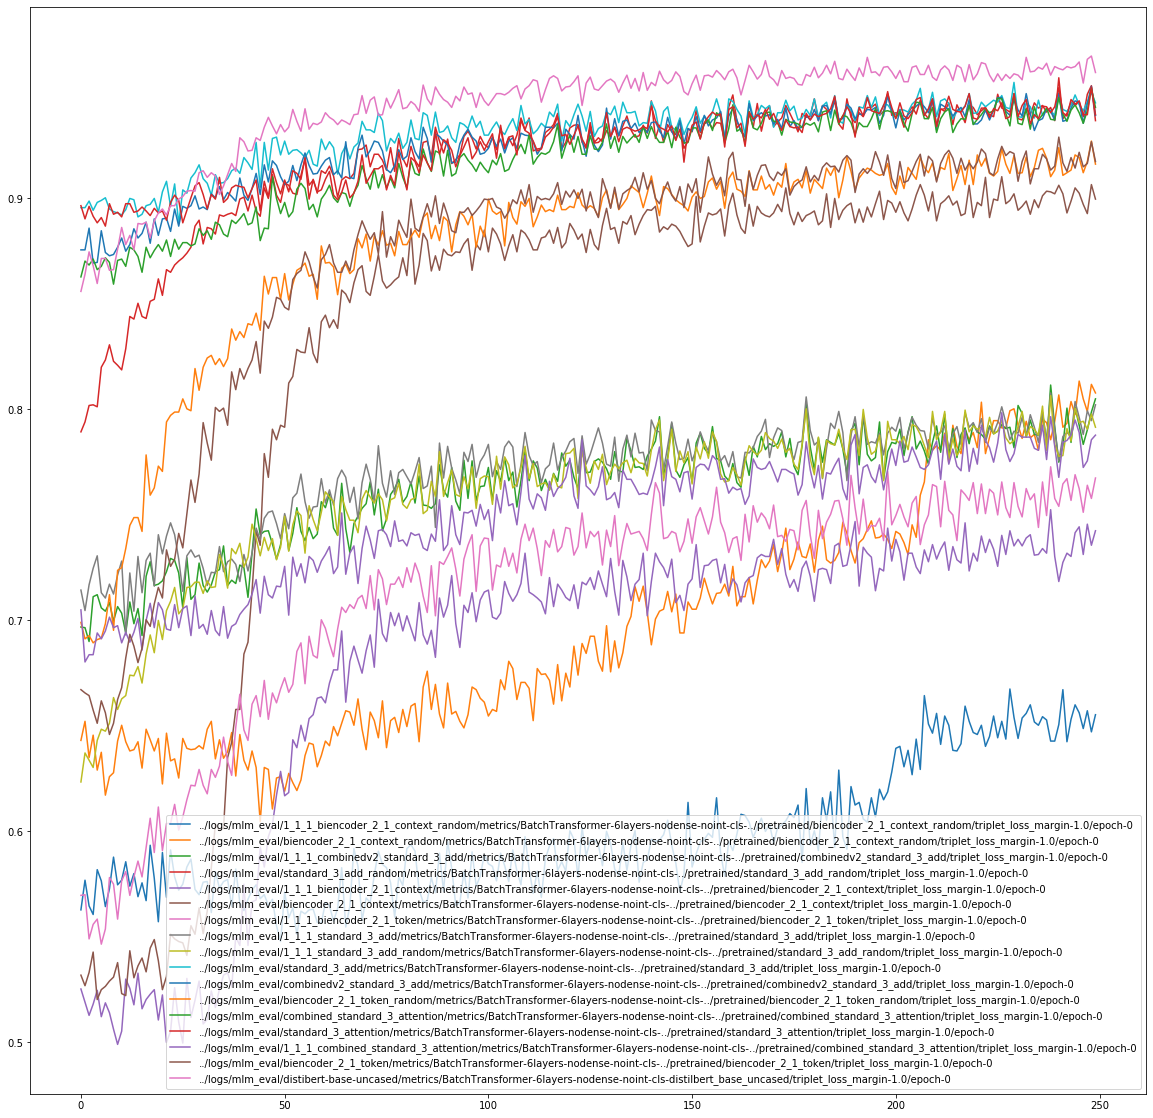

In [74]:
fig, ax = plt.subplots(figsize=(20,20))
fs = glob.glob('../logs/mlm_eval/*/metrics/*/*/*/*/epoch-0')
fs2 = glob.glob('../logs/mlm_eval/distibert-base-uncased/metrics/*/*/epoch-0')
for f in fs + fs2:
    d = json.load(open(f + '/log.json'))
    sns.lineplot(x=range(len(np.arange(0, 1000000, 32*100))), 
                         y=[np.mean(d['metrics'][i:i+32*100]) 
                            for i in np.arange(0, 1000000, 32*100)],
                 label=f)
    #plt.ylim(.4,.85)

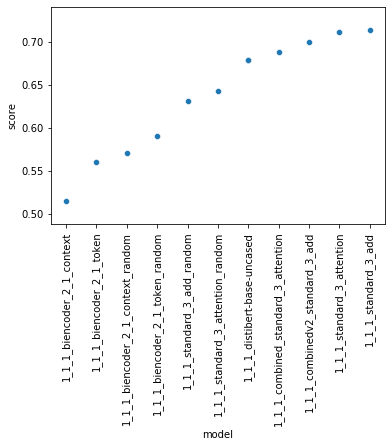

In [54]:
fs = glob.glob('../logs/mlm_eval/1_1_1*/metrics/batch_transformer/*/epoch-test_only')
fs2 = glob.glob('../logs/mlm_eval/1_1_1_distibert-base-uncased/metrics/batch_transformer/*/epoch-test_only')
res = []
for f in fs + fs2:
    d = json.load(open(f + '/log.json'))
    res.append((np.mean(d['test_metrics']), f.split('/')[3]))
resd = pd.DataFrame(res, columns=['score', 'model']).sort_values(by='score')
sns.scatterplot(data=resd, x='model', y='score')
plt.xticks(rotation=90)
plt.show()

In [75]:
fs = glob.glob('../logs/mlm_eval/*/metrics/*/pretrained/*/*/epoch-baseline')
for f in fs:
    d = json.load(open(f + '/log.json'))
    print(f, np.mean(d['test_metrics']))

../logs/mlm_eval/1_1_1_biencoder_2_1_context_random/metrics/BatchTransformer-6layers-nodense-noint-cls-../pretrained/biencoder_2_1_context_random/triplet_loss_margin-1.0/epoch-baseline 0.570855
../logs/mlm_eval/1_1_1_combinedv2_standard_3_add/metrics/BatchTransformer-6layers-nodense-noint-cls-../pretrained/combinedv2_standard_3_add/triplet_loss_margin-1.0/epoch-baseline 0.70021
../logs/mlm_eval/standard_3_add_random/metrics/BatchTransformer-6layers-nodense-noint-cls-../pretrained/standard_3_add_random/triplet_loss_margin-1.0/epoch-baseline 0.79058
../logs/mlm_eval/1_1_1_biencoder_2_1_context/metrics/BatchTransformer-6layers-nodense-noint-cls-../pretrained/biencoder_2_1_context/triplet_loss_margin-1.0/epoch-baseline 0.514415
../logs/mlm_eval/1_1_1_biencoder_2_1_token/metrics/BatchTransformer-6layers-nodense-noint-cls-../pretrained/biencoder_2_1_token/triplet_loss_margin-1.0/epoch-baseline 0.559385
../logs/mlm_eval/1_1_1_standard_3_add/metrics/BatchTransformer-6layers-nodense-noint-cls-.

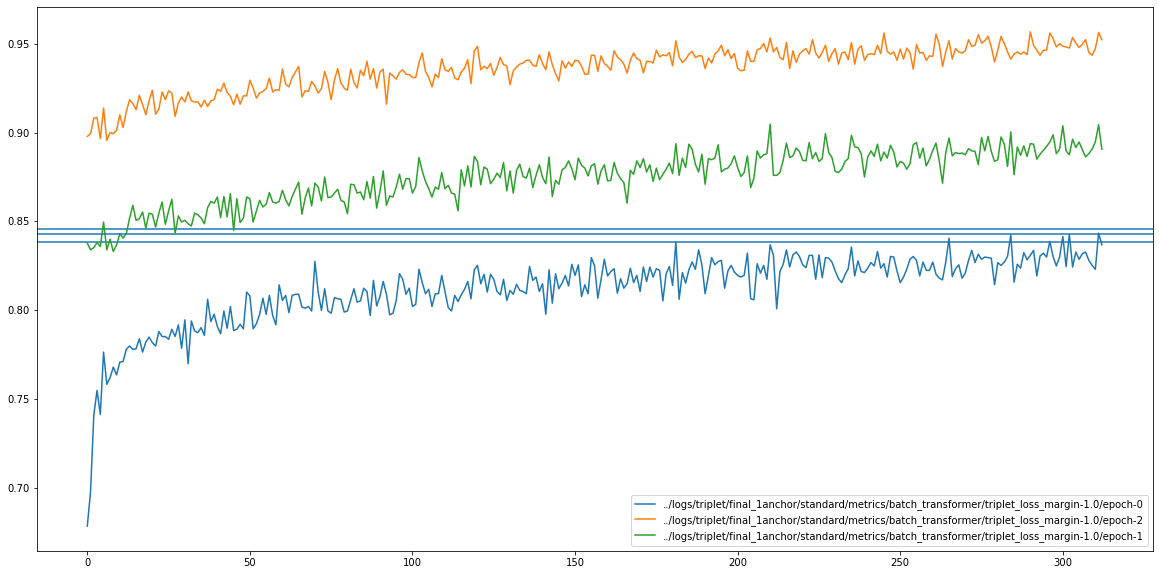

In [77]:
fig, ax = plt.subplots(figsize=(20,10))
fs2 = glob.glob('../logs/triplet/final*1anchor/*/metrics/*/*1.0/epoch-*')
for f in fs2:
    d = json.load(open(f + '/log.json'))
    sns.lineplot(x=range(len(np.arange(0, 1000000, 32*100))), 
                         y=[np.mean(d['metrics'][i:i+32*100]) 
                            for i in np.arange(0, 1000000, 32*100)],
                 label=f)
    plt.axhline(y=np.mean(d['test_metrics']))

    #plt.ylim(.4,.85)

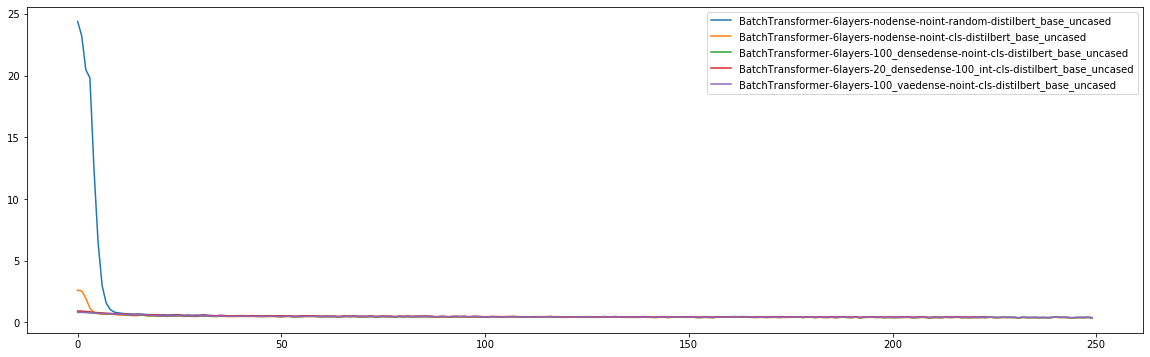

In [248]:
fig, ax = plt.subplots(figsize=(20,6))
fs = glob.glob('../logs/triplet/1anchor/*/metrics/*/*1.0/epoch-0')
for f in fs:
    d = json.load(open(f + '/log.json'))
    sns.lineplot(x=range(len(np.arange(0, 1000000, 32*100))), 
                         y=[np.mean(d['losses'][i:i+32*100]) 
                            for i in np.arange(0, 1000000, 32*100)],
                 label=f.split('/')[-3])
    #plt.ylim(0.4,1)

In [295]:
fs = glob.glob('../logs/triplet/1anchor/*/metrics/*/*1.0/epoch-0')
for f in fs:
    d = json.load(open(f + '/log.json'))
    print(f, 'test: ' + str(np.mean(d['test_metrics'][:300000])), 'train: ' + str(np.mean(d['metrics'][:300000])))

../logs/triplet/1anchor/standard/metrics/BatchTransformer-6layers-20_vaedense-100_int-cls-distilbert_base_uncased/triplet_loss_margin-1.0/epoch-0 test: 0.819135 train: 0.74975
../logs/triplet/1anchor/standard/metrics/BatchTransformer-6layers-nodense-noint-random-distilbert_base_uncased/triplet_loss_margin-1.0/epoch-0 test: 0.83045 train: 0.75281
../logs/triplet/1anchor/standard/metrics/BatchTransformer-6layers-nodense-noint-cls-distilbert_base_uncased/triplet_loss_margin-1.0/epoch-0 test: 0.83478 train: 0.7860966666666667
../logs/triplet/1anchor/standard/metrics/BatchTransformer-6layers-100_densedense-noint-cls-distilbert_base_uncased/triplet_loss_margin-1.0/epoch-0 test: 0.829025 train: 0.77567
../logs/triplet/1anchor/standard/metrics/BatchTransformer-6layers-20_densedense-100_int-cls-distilbert_base_uncased/triplet_loss_margin-1.0/epoch-0 test: nan train: 0.75668
../logs/triplet/1anchor/standard/metrics/BatchTransformer-6layers-100_vaedense-noint-cls-distilbert_base_uncased/triplet_l

In [303]:
fs = glob.glob('../logs/classification/*/metrics/*/*/epoch-0')
for f in fs:
    d = json.load(open(f + '/log.json'))
    print(f, 'test: ' + str(np.mean(d['test_metrics'][:300000])), 'train: ' + str(np.mean(d['metrics'][:300000])))

../logs/classification/1post/metrics/BatchTransformerClassifier-1posts-allemb/classification-loss/epoch-0 test: 0.74427 train: 0.6549166666666667
../logs/classification/1post/metrics/BatchTransformerClassifier-1posts-distanceemb/classification-loss/epoch-0 test: 0.4 train: 0.4875
../logs/classification/3post/metrics/BatchTransformerClassifier-1posts-allemb/classification-loss/epoch-0 test: nan train: 0.6012833333333333


In [302]:
fs

[]